In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

In [2]:
fashion_mnist = tensorflow.keras.datasets.fashion_mnist
(training_images, training_labels), (testing_images, testing_labels) = fashion_mnist.load_data()

In [3]:
training_images = training_images / 255.0
testing_images = testing_images / 255.0

In [4]:
class_names = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boat"]

In [5]:
df = pd.DataFrame({
    "Label":pd.Series(range(1,11)),
    "Class":pd.Series(class_names),
})
df.set_index('Label', inplace=True)

In [6]:
df

,Class
Label,
1,T-shirt/top
2,Trouser
3,Pullover
4,Dress
5,Coat
6,Sandal
7,Shirt
8,Sneaker
9,Bag


In [7]:
training_images.shape

(60000, 28, 28)

In [8]:
training_labels.shape

(60000,)

In [9]:
testing_images.shape

(10000, 28, 28)

In [10]:
testing_labels.shape

(10000,)

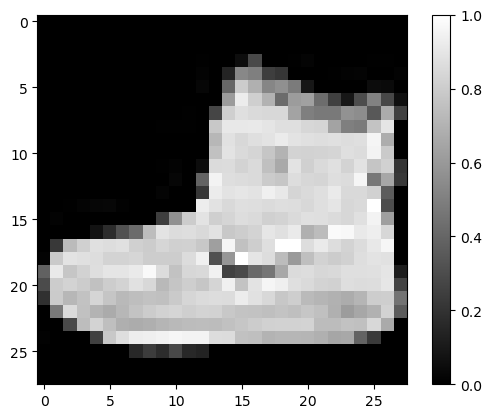

In [11]:
plt.imshow(training_images[0], cmap='gray')
plt.colorbar();

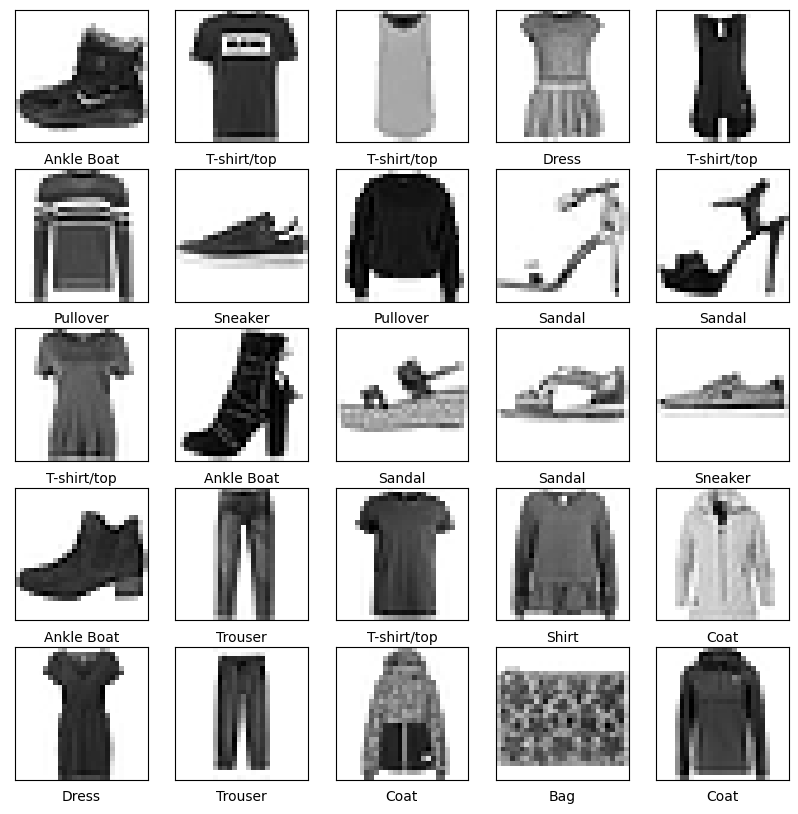

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i]])

In [13]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128,activation='relu'),
    Dropout(0.20),
    Dense(10,activation='softmax')
])

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(training_images, training_labels, validation_data=(testing_images, testing_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5274 - accuracy: 0.8155 - val_loss: 0.4294 - val_accuracy: 0.8467
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4013 - accuracy: 0.8540 - val_loss: 0.4022 - val_accuracy: 0.8552
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3668 - accuracy: 0.8652 - val_loss: 0.3763 - val_accuracy: 0.8680
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3448 - accuracy: 0.8743 - val_loss: 0.3617 - val_accuracy: 0.8694
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3293 - accuracy: 0.8788 - val_loss: 0.3729 - val_accuracy: 0.8679
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3213 - accuracy: 0.8816 - val_loss: 0.3563 - val_accuracy: 0.8733
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3086 - accuracy: 0.8847 - val_loss: 0.3528 - val_accuracy:

In [16]:
loss, acc = model.evaluate(testing_images, testing_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8809


In [19]:
model.save('fashion_mnist_ImageClassification.h5')

In [21]:
predictions = model.predict(testing_images)

313/313 [==============================] - 1s 2ms/step


Ankle Boat


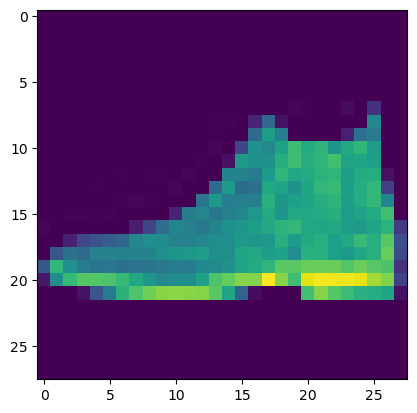

In [32]:
print(class_names[np.argmax(predictions[0])])
plt.imshow(testing_images[0]);

In [73]:
def check_predictions(no_of_image):
        plt.imshow(testing_images[no_of_image])
        print(f"Model Predicted: {class_names[np.argmax(predictions[no_of_image])]}")
        #image_index = np.random.randint(0, len(testing_images))
        #actual = testing_images[no_of_image]
        print("Actual label:", class_names[testing_labels[no_of_image]])

Model Predicted: Coat
Actual label: Coat


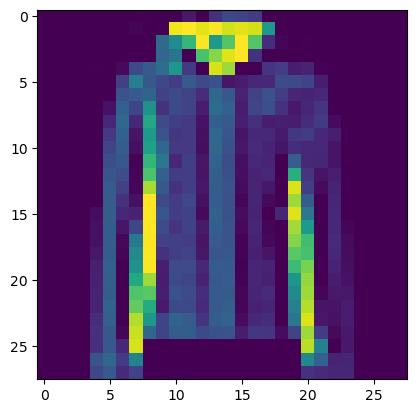

In [79]:
check_predictions(6)